In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("white")

df = pd.read_csv("C:\\Users\\danie\\Documents\\GitHUb\\Machine_Learning_Daniel_Claesson\\data\\Advertising.csv", index_col=0)


Simple linear regression

In [137]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


[Text(0.5, 1.0, 'Spent~Sales relation'),
 Text(0, 0.5, 'Sales'),
 Text(0.5, 0, 'Spent')]

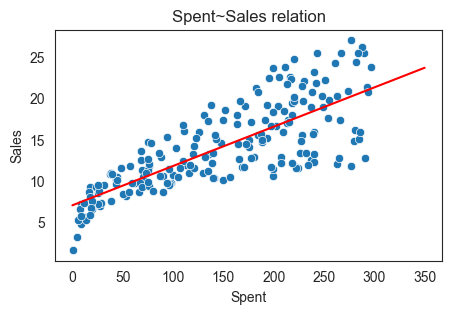

In [138]:
X, y = df["TV"], df['Sales'] # X tilldelas värdena från kolumnen "TV" i dataframen df, y tilldelas "Sales", båda blir pandas dataframes
beta_1, beta_0 = np.polyfit(X, y, deg=1) # beräknar intercept (beta_0) och slope (beta_1) med numpy funktionen polyfit, första gradens polynom

#def y_hat(beta0, beta_1): # funktion som gör samma som labda funktionen
#    beta_0 + beta_1*x

y_hat = lambda x: beta_0 + beta_1 * x # lambda funktion som tar x som argument och returnerar värden för beräkningen till höger om semikolon: dvs beräknar värden för en rät linje baserat på slope och intercept.

print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")
ax.set(
    title="Spent~Sales relation",
    ylabel="Sales",
    xlabel="Spent")

Multiple linear regression:
- skapar en dataframe med vår responsvariabel, y (=Sales)
- skapar en dataframe med våra oberoende variabler x1 (=TV), x2 (=Radio) och x3 (=Newspaper), samt insertar en kolumn "intercept" med värdet 1. Denna är endast till för att regressionsmodellen behöver en sådan variabel för att fungera. Den motsvarar interceptet, och kommer ingå i regressionen, som en skalning av 1.
- Normalekvationen: beta_hat = (X.T * X)^-1 * X.T * y, där

 $\bf{X} = 	\begin{bmatrix} 
	1 & x_1^{(1)} & x_2^{(1)}& \ldots &x_n^{(1)} \\
	1 & x_1^{(2)} & x_2^{(2)}& \ldots &x_n^{(2)}\\
	\vdots & \vdots & \vdots & \ddots & \vdots\\
	1 & x_1^{(m)}& x_2^{(m)}& \ldots &x_n^{(m)}
\end{bmatrix}, \bf{y} = \begin{bmatrix} 
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}, \hat{\bf{\beta}} = \begin{bmatrix} 
\hat\beta_0 \\\hat\beta_1\\ \vdots \\ \hat\beta_n
\end{bmatrix}$

In [139]:
X, y = df.drop("Sales", axis="columns"), df["Sales"] # skapar de nya dataframes
X.insert(0, "Intercept", 1) # insertar en ny kolumn på loc=0, column="intercept" (=namnet), value=1 (ger värdet 1 på alla rader)
X.head()

regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y # Normalekvationen.  (np.linalg.pinv: Compute the (Moore-Penrose) pseudo-inverse of a matrix.)
beta_hat = regression_fit(X, y) # Beräknar beta_hat, genom att kalla på funktionen regression med argumenten X och y
print(f"{beta_hat}") # printar konstanterna för intercept och x-värden
predict = lambda x, beta: np.dot(x, beta) # funktion för att beräkna skalär-produkten av testvärdet (x) och beta(resultatet av den linjära regressionen)

test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat) # kallar på funktionen 'predict' för att beräkna dotprodukten av test_sample och beta_hat

print(
    f"TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts {y_hat:.1f} thousand units"
)

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64
TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts 20.5 thousand units


Splitta datan i training data(70%) och test data(30%):
- Baserat på training data (för x och y), ta fram en multiple regression model.
- Använd test datan (x och y) på regressionsmodellen.
- Evaluera hur bra modellen fungerar, tex genom att beräkna olika metrics för att kvantifiera storleken på felet som prediktionen gör, såsom:
    - MAE - Mean Absolute Error
    - SME - MEan Squared Error
    - RMSE - Root Mean Squared Error

In [140]:
#split into training and test data
y_train = df.iloc[0:140, 3]
y_test = df.iloc[140:201, 3]
X_train = df.iloc[0:140,0:3]
X_train.insert(0, 'Intercept', 1)
X_test = df.iloc[140:201, 0:3]
X_test.insert(0, 'Intercept', 1)

for item in ["y_train", "y_test", "X_train", "X_test"]:
    print(f"shape of {item} is {eval(item).shape}")

shape of y_train is (140,)
shape of y_test is (60,)
shape of X_train is (140, 4)
shape of X_test is (60, 4)


In [141]:
beta_hat = regression_fit(X_train, y_train) # regression_fit resultatet sparas i variabeln beta_hat
print(f"beta_hat: {beta_hat.values}") # beta_hat innehåller intercept och x-värdena för den linjära regressionen

predict = lambda X, weights: X @ weights # X = testvärden för x, weights är beta_hat parametrarna. Eftersom det är multipla testvärden så ska @ användas för matrismultiplikation

y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (4, 1))) # reshapen gör om till 4 rader i en kolumn


beta_hat: [ 3.04514221e+00  4.70486808e-02  1.79682989e-01 -3.00556516e-03]


Jämföra y_hat med y_test, för att kvantifiera felet.

In [142]:
# kikar lite på test värdena och jämför med prediktionen y_hat
print(f'y_test: {y_test[0:5]}')
print(f"Shape y_test: {np.shape(y_test)}")
print(f"Type y_test = {type(y_test)}") # y_test är en pandas series, den behöver nedan göras om till en np array.
print(f'y_hat: {y_hat[0:5]}')
print(f"Shape y_hat: {np.shape(y_hat)}")
print(f"Type y_hat: {type(y_hat)}")


y_test: 141    10.9
142    19.2
143    20.1
144    10.4
145    11.4
Name: Sales, dtype: float64
Shape y_test: (60,)
Type y_test = <class 'pandas.core.series.Series'>
y_hat: [[ 9.5143544 ]
 [18.29202877]
 [19.27094064]
 [ 8.88723582]
 [10.11361706]]
Shape y_hat: (60, 1)
Type y_hat: <class 'numpy.ndarray'>


Evaluering av modellen:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

In [143]:
n = len(y_test)
y_test = np.array(y_test).reshape(60,1) # gör om y_test från Pandas Serie till np.array och reshapar så det blir 60 rader och en kolumn (istället för 60 värden i en rad.)
print(f'y_hat: {y_hat[0:5]}') # bara för att kolla hur det ser ut
print(f'y_test: {y_test[0:5]}') # bara för att kolla hur det ser ut

MAE = 1/n * np.sum(abs(y_test - y_hat))
MSE = 1/n * np.sum((y_test - y_hat)**2)
RMSE = np.sqrt(MSE)

for item in ['MAE','MSE','RMSE']:
    print(f"{item}: {eval(item)}")

y_hat: [[ 9.5143544 ]
 [18.29202877]
 [19.27094064]
 [ 8.88723582]
 [10.11361706]]
y_test: [[10.9]
 [19.2]
 [20.1]
 [10.4]
 [11.4]]
MAE: 1.2415612923036727
MSE: 2.5579659254609597
RMSE: 1.599364225391127
